In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [2]:
data = pd.read_csv('UK House price index Index Price.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time                  327 non-null    object 
 1   City of London        327 non-null    float64
 2   Barking & Dagenham    327 non-null    float64
 3   Barnet                327 non-null    float64
 4   Bexley                327 non-null    float64
 5   Brent                 327 non-null    float64
 6   Bromley               327 non-null    float64
 7   Camden                327 non-null    float64
 8   Croydon               327 non-null    float64
 9   Ealing                327 non-null    float64
 10  Enfield               327 non-null    float64
 11  Greenwich             327 non-null    float64
 12  Hackney               327 non-null    float64
 13  Hammersmith & Fulham  327 non-null    float64
 14  Haringey              327 non-null    float64
 15  Harrow                3

In [4]:
data.head()

,Time,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,Jan-95,11.7000,22.9000,20.2000,24.8000,16.9000,21.9000,15.7000,23.9000,19.4000,...,32.3000,32.9000,29.6000,30.6000,24.8000,18.5000,24.2000,25.7000,nan,26.2000
1,Feb-95,10.5000,23.2000,20.2000,24.8000,17.0000,21.9000,15.5000,23.9000,19.6000,...,32.3000,32.7000,30.0000,31.1000,24.8000,18.1000,24.1000,25.5000,nan,26.2000
2,Mar-95,10.1000,23.3000,20.0000,24.6000,17.0000,21.8000,15.6000,23.8000,19.7000,...,32.7000,33.2000,29.5000,31.2000,24.6000,18.3000,24.2000,25.2000,nan,26.2000
3,Apr-95,9.8000,24.1000,19.7000,24.6000,17.3000,21.8000,15.6000,23.8000,19.9000,...,32.5000,33.5000,30.0000,31.2000,24.8000,18.5000,24.4000,25.7000,nan,26.4000
4,May-95,10.8000,24.1000,19.6000,24.4000,17.4000,21.9000,15.6000,23.8000,19.9000,...,32.5000,32.9000,29.9000,31.7000,24.7000,18.7000,24.4000,25.7000,nan,26.5000


In [5]:
df=data

In [6]:
df.head()

,Time,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,Jan-95,11.7000,22.9000,20.2000,24.8000,16.9000,21.9000,15.7000,23.9000,19.4000,...,32.3000,32.9000,29.6000,30.6000,24.8000,18.5000,24.2000,25.7000,nan,26.2000
1,Feb-95,10.5000,23.2000,20.2000,24.8000,17.0000,21.9000,15.5000,23.9000,19.6000,...,32.3000,32.7000,30.0000,31.1000,24.8000,18.1000,24.1000,25.5000,nan,26.2000
2,Mar-95,10.1000,23.3000,20.0000,24.6000,17.0000,21.8000,15.6000,23.8000,19.7000,...,32.7000,33.2000,29.5000,31.2000,24.6000,18.3000,24.2000,25.2000,nan,26.2000
3,Apr-95,9.8000,24.1000,19.7000,24.6000,17.3000,21.8000,15.6000,23.8000,19.9000,...,32.5000,33.5000,30.0000,31.2000,24.8000,18.5000,24.4000,25.7000,nan,26.4000
4,May-95,10.8000,24.1000,19.6000,24.4000,17.4000,21.9000,15.6000,23.8000,19.9000,...,32.5000,32.9000,29.9000,31.7000,24.7000,18.7000,24.4000,25.7000,nan,26.5000


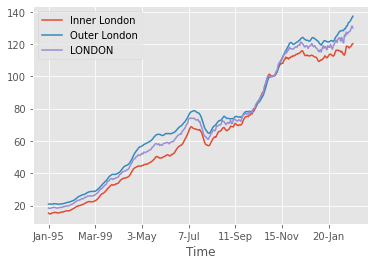

In [7]:
# Setup matplotlib
import matplotlib.pyplot as plt

# Create an axes object 
axes = plt.gca()

# pass the axes object to plot function
df.plot(kind='line', x='Time', y='Inner London', ax=axes);
df.plot(kind='line', x='Time', y='Outer London', ax=axes);
df.plot(kind='line', x='Time', y='LONDON', ax=axes);

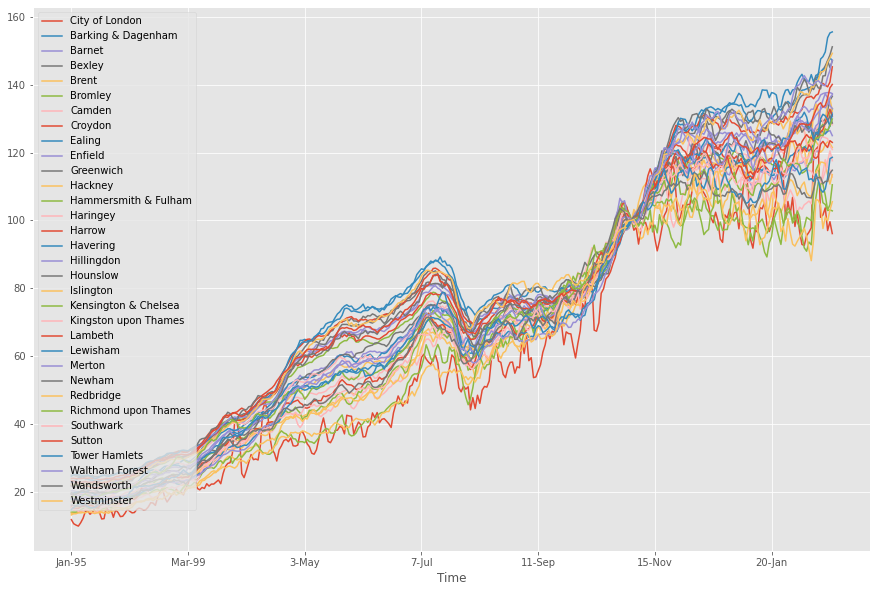

In [8]:
# Setup matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

# Create an axes object 
axes = plt.gca()

# pass the axes object to plot function
df.plot(kind='line', x='Time', y='City of London', ax=axes);
df.plot(kind='line', x='Time', y='Barking & Dagenham', ax=axes);
df.plot(kind='line', x='Time', y='Barnet', ax=axes);
df.plot(kind='line', x='Time', y='Bexley', ax=axes);
df.plot(kind='line', x='Time', y='Brent', ax=axes);
df.plot(kind='line', x='Time', y='Bromley', ax=axes);
df.plot(kind='line', x='Time', y='Camden', ax=axes);
df.plot(kind='line', x='Time', y='Croydon', ax=axes);
df.plot(kind='line', x='Time', y='Ealing', ax=axes);
df.plot(kind='line', x='Time', y='Enfield', ax=axes);
df.plot(kind='line', x='Time', y='Greenwich', ax=axes);
df.plot(kind='line', x='Time', y='Hackney', ax=axes);
df.plot(kind='line', x='Time', y='Hammersmith & Fulham', ax=axes);
df.plot(kind='line', x='Time', y='Haringey', ax=axes);
df.plot(kind='line', x='Time', y='Harrow', ax=axes);
df.plot(kind='line', x='Time', y='Havering', ax=axes);
df.plot(kind='line', x='Time', y='Hillingdon', ax=axes);
df.plot(kind='line', x='Time', y='Hounslow', ax=axes);
df.plot(kind='line', x='Time', y='Islington', ax=axes);
df.plot(kind='line', x='Time', y='Kensington & Chelsea', ax=axes);
df.plot(kind='line', x='Time', y='Kingston upon Thames', ax=axes);
df.plot(kind='line', x='Time', y='Lambeth', ax=axes);
df.plot(kind='line', x='Time', y='Lewisham', ax=axes);
df.plot(kind='line', x='Time', y='Merton', ax=axes);
df.plot(kind='line', x='Time', y='Newham', ax=axes);
df.plot(kind='line', x='Time', y='Redbridge', ax=axes);
df.plot(kind='line', x='Time', y='Richmond upon Thames', ax=axes);
df.plot(kind='line', x='Time', y='Southwark', ax=axes);
df.plot(kind='line', x='Time', y='Sutton', ax=axes);
df.plot(kind='line', x='Time', y='Tower Hamlets', ax=axes);
df.plot(kind='line', x='Time', y='Waltham Forest', ax=axes);
df.plot(kind='line', x='Time', y='Wandsworth', ax=axes);
df.plot(kind='line', x='Time', y='Westminster', ax=axes);

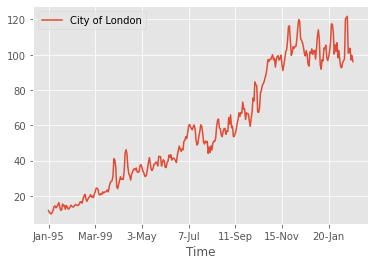

In [9]:
df.plot(x='Time', y='City of London')

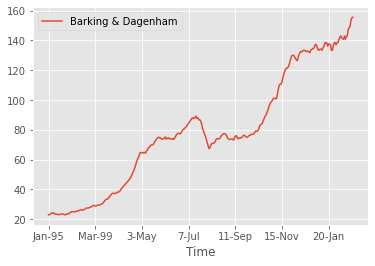

In [10]:
df.plot(x='Time', y='Barking & Dagenham')

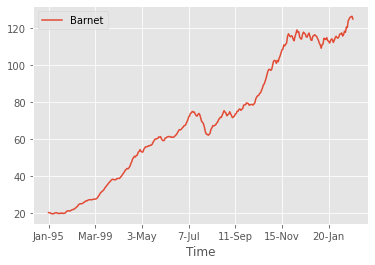

In [11]:
df.plot(x='Time', y='Barnet')

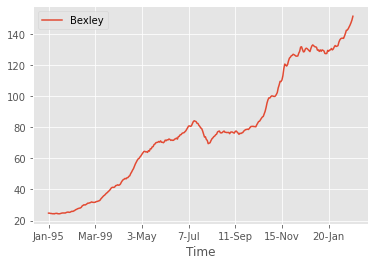

In [12]:
df.plot(x='Time', y='Bexley')

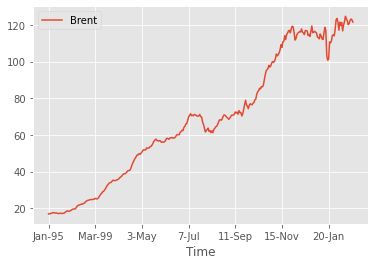

In [13]:
df.plot(x='Time', y='Brent')

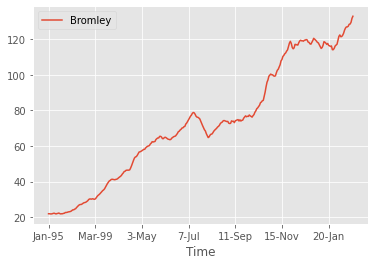

In [14]:
df.plot(x='Time', y='Bromley')

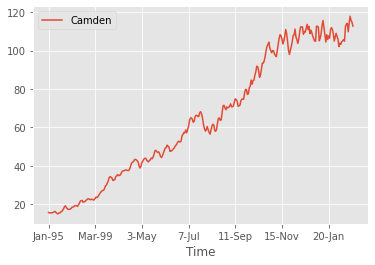

In [15]:
df.plot(x='Time', y='Camden')

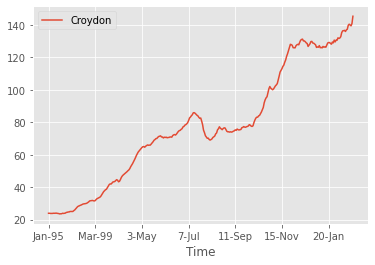

In [16]:
df.plot(x='Time', y='Croydon')

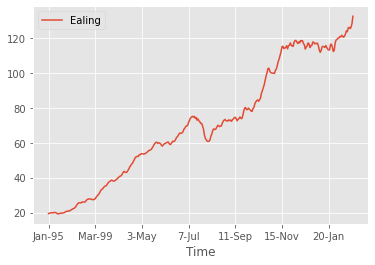

In [17]:
df.plot(x='Time', y='Ealing')

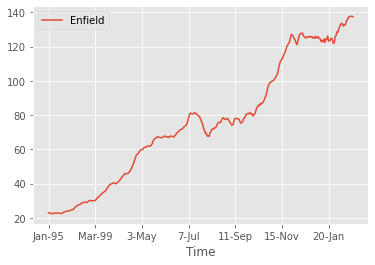

In [18]:
df.plot(x='Time', y='Enfield')

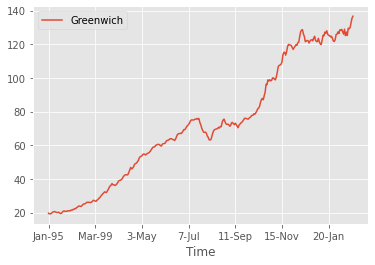

In [19]:
df.plot(x='Time', y='Greenwich')

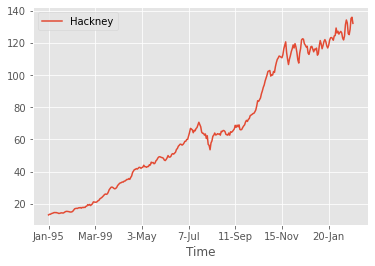

In [20]:
df.plot(x='Time', y='Hackney')

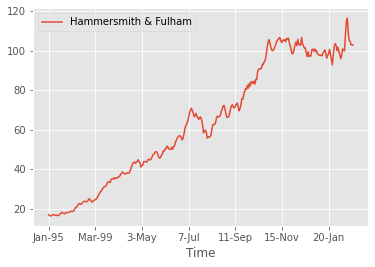

In [21]:
df.plot(x='Time', y='Hammersmith & Fulham')

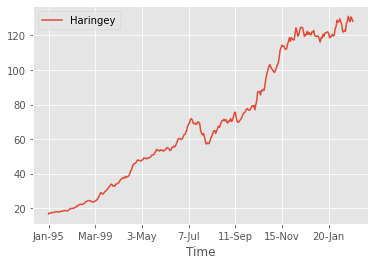

In [22]:
df.plot(x='Time', y='Haringey')

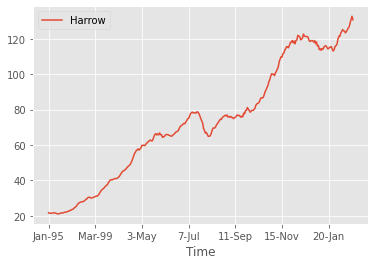

In [23]:
df.plot(x='Time', y='Harrow')

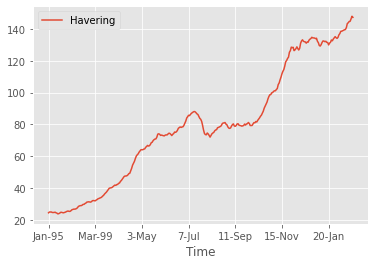

In [24]:
df.plot(x='Time', y='Havering')

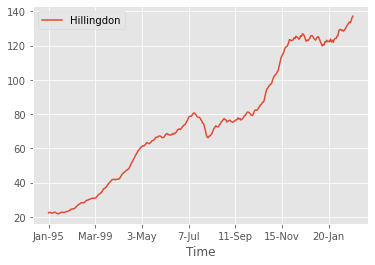

In [25]:
df.plot(x='Time', y='Hillingdon')

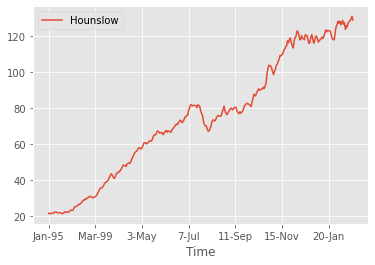

In [26]:
df.plot(x='Time', y='Hounslow')

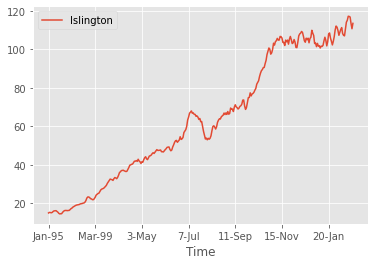

In [27]:
df.plot(x='Time', y='Islington')

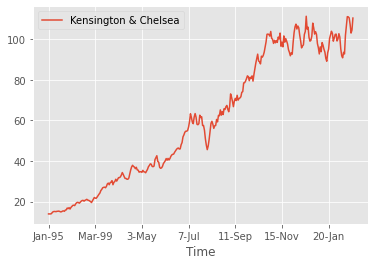

In [28]:
df.plot(x='Time', y='Kensington & Chelsea')

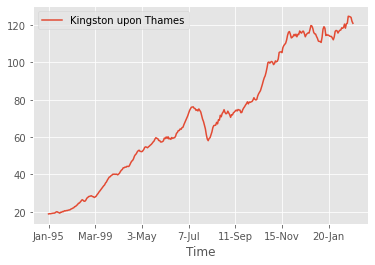

In [29]:
df.plot(x='Time', y='Kingston upon Thames')

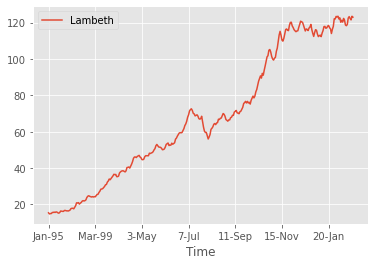

In [30]:
df.plot(x='Time', y='Lambeth')

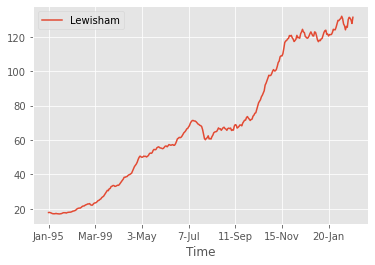

In [31]:
df.plot(x='Time', y='Lewisham')

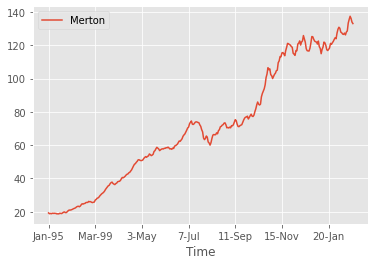

In [32]:
df.plot(x='Time', y='Merton')

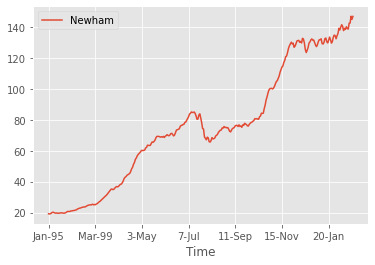

In [33]:
df.plot(x='Time', y='Newham')

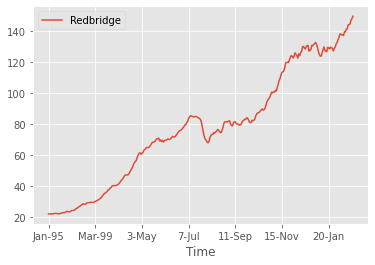

In [34]:
df.plot(x='Time', y='Redbridge')

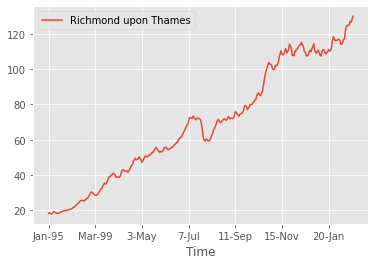

In [35]:
df.plot(x='Time', y='Richmond upon Thames')

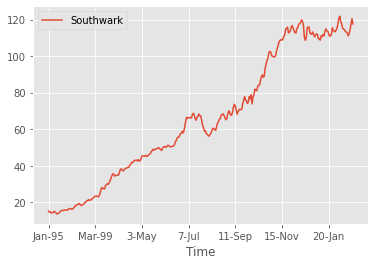

In [36]:
df.plot(x='Time', y='Southwark')

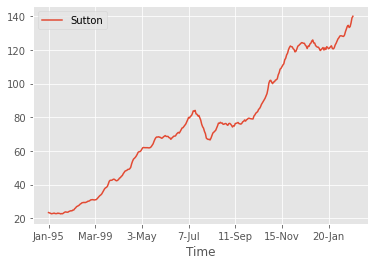

In [37]:
df.plot(x='Time', y='Sutton')

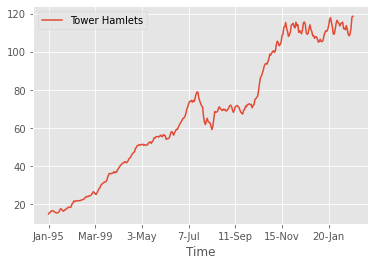

In [38]:
df.plot(x='Time', y='Tower Hamlets')

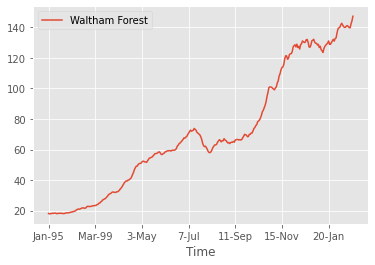

In [39]:
df.plot(x='Time', y='Waltham Forest')

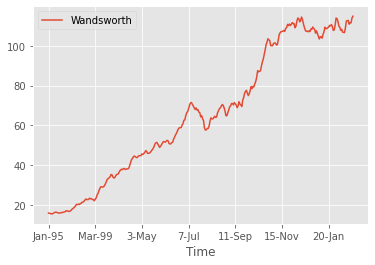

In [40]:
df.plot(x='Time', y='Wandsworth')

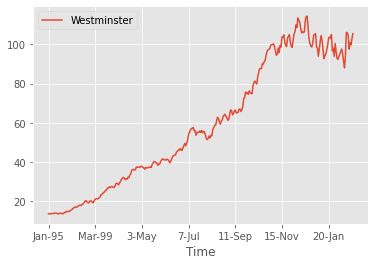

In [41]:
df.plot(x='Time', y='Westminster')